<h1>Лабораторна робота 2</h1>
<p><b>Тема:</b> Основи роботи з сигналами в Python.</p>
<p><b>Мета:</b> Закріпити теоретичні знання щодо моделювання періодичних сигналів за допомогою ряду Фур’є та різних систем базисних функцій, набути навичок гармонічного аналізу та синтезу.</p>
<h2>Завдання для самостійної роботи</h2>
<ol>
<li>
Згідно із заданим варіантом розглянути періодичний сигнал та розкласти його спочатку:
<ul>
<li>У тригонометричний ряд Фур’є, отримавши коефіцієнти ряду <i>a<sub>k</sub></i> та <i>b<sub>k</sub></i>. Виконати синтез сигналу. Побудувати відповідні графіки.</li>
<li>У тригонометричний ряд Фур’є, отримавши коефіцієнти <i>A<sub>k</sub></i>, <i>φ<sub>k</sub></i>. Побудувати амплітудний та фазовий спектр. Виконати синтез сигналу.</li>
<li>У комплексний ряд Фур’є. Побудувати амплітудний та фазовий спектри. Виконати синтез сигналу.</li>
<li>У ряд Фур’є за системою базисних функцій Уолша–Пелі.</li>
<li>Кількість гармонік: <b>N = 8 – 10</b>. Побудувати відповідний спектр сигналу. Виконати синтез сигналу.</li>
</ul>
</li>
<li>
Синтезувати (відновити) сигнали у кожному базисі. Зобразити на одному графіку вихідний сигнал, синтезований за допомогою тригонометричного ряду Фур’є та синтезований за допомогою базису Уолша–Пелі.</li>
<li>Обчислити норму похибки апроксимації для кожного з базисів для одного й того самого значення <b>N</b>. Зробити висновки щодо якості апроксимації кожним з методів.</li></ol>

<img src="scr\Screenshot_1.png" alt="!" style="display:block; margin:auto; width:70%;">

--- 1. Вхідний сигнал ---


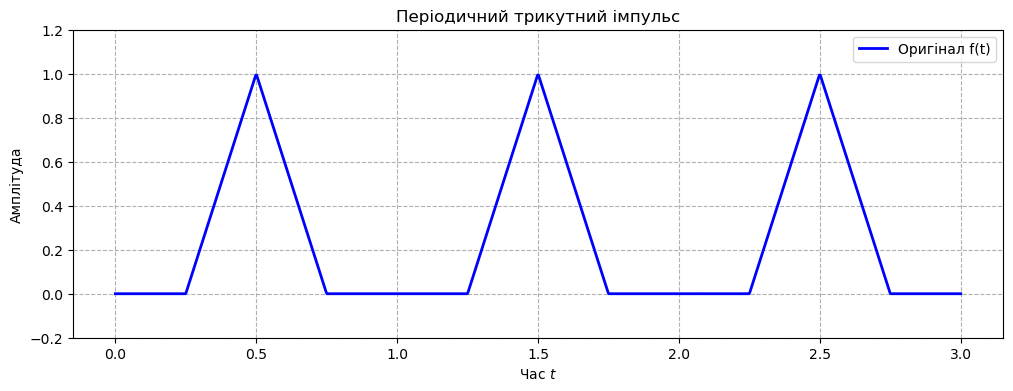


--- Тригонометричний ряд (a_k, b_k) ---
a0 = 0.5000
ak (k=1..5): ['-0.4053', '0.2026', '-0.0450', '0.0000', '-0.0162']
bk (k=1..5): ['0.0000', '-0.0000', '0.0000', '-0.0000', '0.0000']
Зверніть увагу: всі bk ~ 0. Це тому, що сигнал симетричний відносно t=0.5 (T/2).

--- Амплітудно-фазовий спектр ---


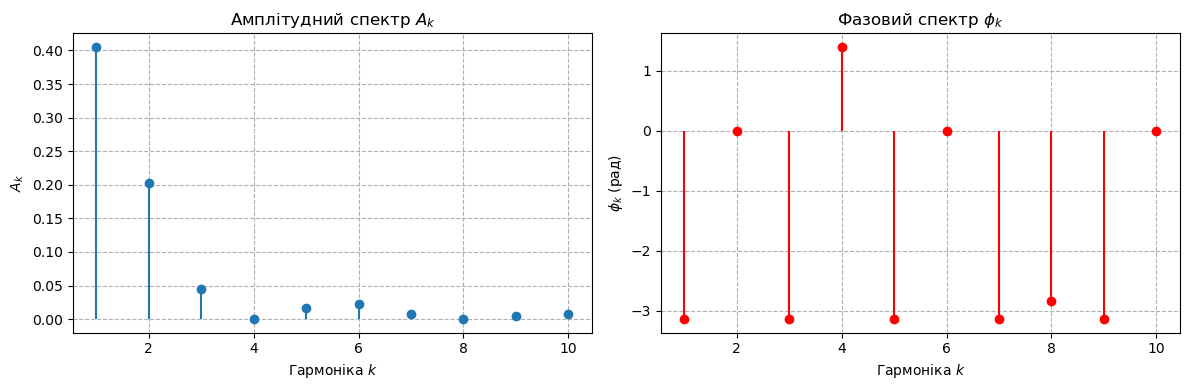


--- Комплексний ряд Фур'є ---
C_0 = 0.2500+0.0000j (Примітка: C_0 = a0/2 = 0.2500)
C_1 = -0.2026-0.0000j (Примітка: C_1 = (a1 - j*b1)/2 = -0.2026)
Фазовий спектр ~ 0, оскільки C_k (коефіцієнти) переважно дійсні числа.


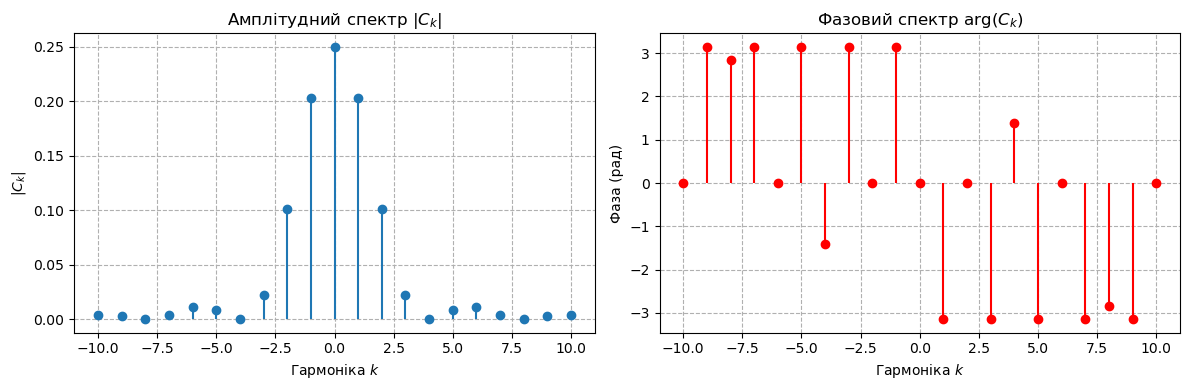


--- Базис Уолша-Пелі (N=8) ---
Коефіцієнти Уолша–Пелі (W_k):
W_0 = 0.2500
W_1 = 0.0000
W_2 = 0.0001
W_3 = 0.1250
W_4 = -0.0001
W_5 = -0.1250
W_6 = -0.2500
W_7 = 0.0000


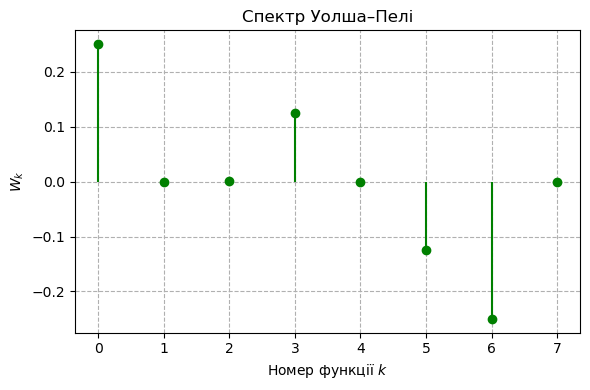


--- Порівняння синтезу ---


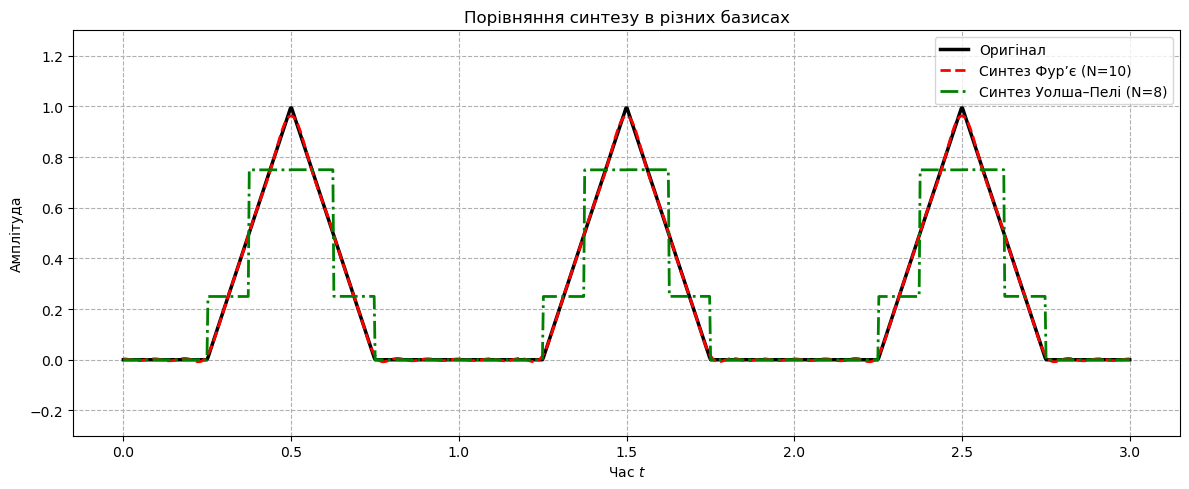


--- Обчислення похибки апроксимації ---
Середньоквадратична похибка (MSE):
  Фур’є (N=10): 0.00002820
  Уолш (N=8):   0.01031273

L2-норма похибки (як у методичці):
  Фур’є (N=10): 0.16792
  Уолш (N=8):  3.21134


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import hadamard
from sklearn.metrics import mean_squared_error 

def periodic_tri_signal(t, A=1.0, T=1.0, t1=0.25, t2=0.5):
    t_mod = np.mod(t, T)
    
    t_start = t1
    t_peak = t2
    t_end = t1 + t2
    
    scale = A / (t2 - t1) 

    cond1 = (t_mod >= t_start) & (t_mod <= t_peak)
    cond2 = (t_mod > t_peak) & (t_mod <= t_end)

    f_t = np.where(cond1, scale * (t_mod - t1), 0.0)
    f_t = np.where(cond2, scale * (t2 + t1 - t_mod), f_t)
    
    return f_t

def f_single_period(t):
    A = 1.0
    T = 1.0
    t1 = 0.25
    t2 = 0.5
    
    t_start = t1
    t_peak = t2
    t_end = t1 + t2 
    
    scale = A / (t2 - t1)

    if (t >= t_start) and (t <= t_peak):
        return scale * (t - t1)
    elif (t > t_peak) and (t <= t_end):
        return scale * (t2 + t1 - t)
    else:
        return 0.0

T = 1.0
A = 1.0
N = 10 
N_walsh = 8

print("--- 1. Вхідний сигнал ---")
t_plot = np.linspace(0, 3*T, 1000)
f_original = periodic_tri_signal(t_plot, A=A, T=T, t1=0.25, t2=0.5)

plt.figure(figsize=(12, 4))
plt.plot(t_plot, f_original, 'b', linewidth=2, label='Оригінал f(t)')
plt.title('Періодичний трикутний імпульс')
plt.xlabel('Час $t$')
plt.ylabel('Амплітуда')
plt.ylim(-0.2, 1.2)
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

def compute_fourier_coeffs_trig(f, T, N):
    omega0 = 2 * np.pi / T
    a0 = (2 / T) * quad(f, 0, T)[0]
    ak = np.zeros(N + 1)
    bk = np.zeros(N + 1)
    
    for k in range(1, N + 1):
        ak[k] = (2 / T) * quad(lambda t: f(t) * np.cos(k * omega0 * t), 0, T)[0]
        bk[k] = (2 / T) * quad(lambda t: f(t) * np.sin(k * omega0 * t), 0, T)[0]
    
    return a0, ak, bk

def synthesize_fourier_trig(t, a0, ak, bk, T, N):
    omega0 = 2 * np.pi / T
    result = (a0 / 2) * np.ones_like(t)
    for k in range(1, N + 1):
        result += ak[k] * np.cos(k * omega0 * t) + bk[k] * np.sin(k * omega0 * t)
    return result

print("\n--- Тригонометричний ряд (a_k, b_k) ---")
a0, ak, bk = compute_fourier_coeffs_trig(f_single_period, T=T, N=N)

print(f"a0 = {a0:.4f}")
print("ak (k=1..5):", ["{:.4f}".format(ak[k]) for k in range(1, 6)])
print("bk (k=1..5):", ["{:.4f}".format(bk[k]) for k in range(1, 6)])
print("Зверніть увагу: всі bk ~ 0. Це тому, що сигнал симетричний відносно t=0.5 (T/2).")

print("\n--- Амплітудно-фазовий спектр ---")
k_vals = np.arange(1, N + 1)
A_k = np.sqrt(ak[1:]**2 + bk[1:]**2)
phi_k = -np.arctan2(bk[1:], ak[1:])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(k_vals, A_k, basefmt=" ")
plt.title('Амплітудний спектр $A_k$')
plt.xlabel('Гармоніка $k$')
plt.ylabel('$A_k$')
plt.grid(True, linestyle='--')

plt.subplot(1, 2, 2)
plt.stem(k_vals, phi_k, basefmt=" ", linefmt='r', markerfmt='ro')
plt.title('Фазовий спектр $\\phi_k$')
plt.xlabel('Гармоніка $k$')
plt.ylabel('$\\phi_k$ (рад)')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

def compute_fourier_coeffs_complex(f, T, N):
    omega0 = 2 * np.pi / T
    C = np.zeros(2 * N + 1, dtype=complex)
    
    for k in range(-N, N + 1):
        integrand_real = lambda t: f(t) * np.cos(k * omega0 * t)
        integrand_imag = lambda t: f(t) * np.sin(k * omega0 * t)
        
        real_part = (1 / T) * quad(integrand_real, 0, T)[0]
        imag_part = (1 / T) * quad(integrand_imag, 0, T)[0]
        
        C_k = real_part - 1j * imag_part
        C[N + k] = C_k
    return C

print("\n--- Комплексний ряд Фур'є ---")
C = compute_fourier_coeffs_complex(f_single_period, T=T, N=N)
k_vals_complex = np.arange(-N, N + 1)
amp_complex = np.abs(C)
phase_complex = np.angle(C)

print(f"C_0 = {C[N]:.4f} (Примітка: C_0 = a0/2 = {a0/2:.4f})")
print(f"C_1 = {C[N+1]:.4f} (Примітка: C_1 = (a1 - j*b1)/2 = {ak[1]/2:.4f})")
print("Фазовий спектр ~ 0, оскільки C_k (коефіцієнти) переважно дійсні числа.")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(k_vals_complex, amp_complex, basefmt=" ")
plt.title('Амплітудний спектр $|C_k|$')
plt.xlabel('Гармоніка $k$')
plt.ylabel('$|C_k|$')
plt.grid(True, linestyle='--')

plt.subplot(1, 2, 2)
plt.stem(k_vals_complex, phase_complex, basefmt=" ", linefmt='r', markerfmt='ro')
plt.title('Фазовий спектр $\\arg(C_k)$')
plt.xlabel('Гармоніка $k$')
plt.ylabel('Фаза (рад)')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

def walsh_paley_functions(t, N, T=1.0):
    if not (N & (N - 1) == 0):
        raise ValueError("N must be a power of 2")
    H = hadamard(N)
    t_norm = np.mod(t, T) / T
    indices = (t_norm * N).astype(int) % N
    return H[:, indices].T

def compute_walsh_coeffs(f, T, N):
    t_int = np.linspace(0, T, 8192, endpoint=False)
    f_vals = np.array([f(t) for t in t_int])
    W_matrix = walsh_paley_functions(t_int, N, T)
    
    coeffs = (1 / T) * np.trapz(f_vals[:, None] * W_matrix, t_int, axis=0)
    return coeffs

print(f"\n--- Базис Уолша-Пелі (N={N_walsh}) ---")
W_coeffs = compute_walsh_coeffs(f_single_period, T=T, N=N_walsh)
k_walsh = np.arange(N_walsh)

print("Коефіцієнти Уолша–Пелі (W_k):")
for k, w in enumerate(W_coeffs):
    print(f"W_{k} = {w:.4f}")

plt.figure(figsize=(6, 4))
plt.stem(k_walsh, W_coeffs, basefmt=" ", linefmt='g', markerfmt='go')
plt.title('Спектр Уолша–Пелі')
plt.xlabel('Номер функції $k$')
plt.ylabel('$W_k$')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

print("\n--- Порівняння синтезу ---")

f_synthesized_fourier = synthesize_fourier_trig(t_plot, a0, ak, bk, T, N)

def synthesize_walsh(t, coeffs, N, T=1.0):
    W_matrix = walsh_paley_functions(t, N, T)
    return W_matrix @ coeffs

f_synthesized_walsh = synthesize_walsh(t_plot, W_coeffs, N_walsh, T)

# Графік
plt.figure(figsize=(12, 5))
plt.plot(t_plot, f_original, 'k', linewidth=2.5, label='Оригінал')
plt.plot(t_plot, f_synthesized_fourier, 'r--', linewidth=2, 
         label=f'Синтез Фур’є (N={N})')
plt.plot(t_plot, f_synthesized_walsh, 'g-.', linewidth=2, 
         label=f'Синтез Уолша–Пелі (N={N_walsh})')
plt.title('Порівняння синтезу в різних базисах')
plt.xlabel('Час $t$')
plt.ylabel('Амплітуда')
plt.ylim(-0.3, 1.3)
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

print("\n--- Обчислення похибки апроксимації ---")

mse_fourier = mean_squared_error(f_original, f_synthesized_fourier)
mse_walsh = mean_squared_error(f_original, f_synthesized_walsh)

err_fourier_L2 = np.sqrt(np.sum((f_original - f_synthesized_fourier)**2))
err_walsh_L2 = np.sqrt(np.sum((f_original - f_synthesized_walsh)**2))

print(f"Середньоквадратична похибка (MSE):")
print(f"  Фур’є (N={N}): {mse_fourier:.8f}")
print(f"  Уолш (N={N_walsh}):   {mse_walsh:.8f}")

print(f"\nL2-норма похибки (як у методичці):")
print(f"  Фур’є (N={N}): {err_fourier_L2:.5f}")
print(f"  Уолш (N={N_walsh}):  {err_walsh_L2:.5f}")

<h1>Контрольні запитання</h1>

<p>1. Як впливає симетрія періодичного сигналу (парна, непарна, відсутність симетрії) на структуру його тригонометричного ряду Фур’є? Наведіть приклади коефіцієнтів <i>a<sub>k</sub></i> та <i>b<sub>k</sub></i>,  які стають нульовими у кожному випадку.</p>
<p>Симетрія сигналу відносно осі t=0 значно спрощує ряд Фур’є.
Якщо сигнал парний, тобто симетричний відносно вертикальної осі (f(t) = f(-t)), як-от cos(t), то він складається лише з постійної складової (a0) та косинусних гармонік. Усі синусні коефіцієнти b_k дорівнюють нулю.
Якщо сигнал непарний, тобто симетричний відносно початку координат (f(t) = -f(-t)), як-от sin(t), то він не має постійної складової і складається лише з синусних гармонік. Усі косинусні коефіцієнти a_k (включно з k=0) дорівнюють нулю.
Якщо ж симетрія відсутня, як у трикутному сигналі, що починається в t=0.25, то у загальному випадку ряд Фур’є містить і косинусні (a_k), і синусні (b_k) компоненти. Варто зазначити, що сигнал має "приховану" симетрію відносно лінії t=0.5, тому його коефіцієнти b_k також стали нульовими.</p>

<p>2. Чому для апроксимації прямокутного імпульсу базис Уолша–Пелі часто забезпечує меншу похибку порівняно з базисом Фур’є при однаковій кількості базисних функцій? Поясніть з точки зору властивостей базисних функцій.</p>
<p>Для апроксимації прямокутного імпульсу базис Уолша–Пелі часто забезпечує меншу похибку порівняно з базисом Фур’є. Це пов'язано з різною "формою" базисних функцій. Базис Фур’є (sin, cos) складається з гладких функцій, тоді як базис Уолша–Пелі складається з кусково-постійних "сходинок".
Прямокутний імпульс сам є кусково-постійною функцією з різкими розривами.
Проблема Фур’є в тому, що для апроксимації одного різкого розриву гладкими синусоїдами потрібна нескінченна кількість гармонік. При обмеженій кількості N функцій Фур’є завжди буде похибка, особливо біля розривів (явище Гіббса).
Перевага Уолша в тому, що його базисні функції самі виглядають як "сходинки". Комбінуючи їх, можна ідеально відтворити іншу "сходинкову" функцію, як-от прямокутний імпульс, використовуючи малу кількість базисних функцій. Таким чином, базис Уолша за своєю природою краще підходить для опису сигналів з різкими переходами.</p>

<p>3. Як пов’язані між собою три форми ряду Фур’є (тригонометрична, амплітудно-фазова, комплексна)? Поясніть, як за коефіцієнтами a<sub>k</sub> і b<sub>k</sub> обчислити амплітуду A<sub>k</sub> фазу φ<sub>k</sub> та комплексний коефіцієнт c<sub>k</sub>.</p>
<p>Всі три форми ряду Фур’є (тригонометрична, амплітудно-фазова, комплексна) описують один і той самий сигнал, просто різними записами. Маючи коефіцієнти тригонометричної форми (a0, a_k, b_k), ми можемо знайти інші.
Для амплітудно-фазової форми амплітуда A_k = sqrt(a_k^2 + b_k^2), а фаза phi_k = -arctan(b_k / a_k). Постійна складова A_0 = a_0 / 2.
Для комплексної форми постійна складова c_0 = a_0 / 2. Додатні гармоніки (k > 0) c_k = (a_k - j * b_k) / 2. Від’ємні гармоніки (k < 0) c_k = (a_k + j * b_k) / 2 (або c_{-k} є комплексним спряженням до c_k).</p>

<p>4. Що таке узагальнений ряд Фур’є? Наведіть умови, за яких система функцій є ортонормованою, і поясніть, чому це важливо для розкладу сигналу.</p>
<p>Узагальнений ряд Фур’є — це представлення сигналу f(t) у вигляді нескінченної суми базисних функцій {psi_k(t)} з деякої системи. Класичний ряд Фур’є та ряд Уолша є лише окремими випадками цього узагальненого ряду.
Система функцій {psi_k(t)} називається ортонормованою, якщо вона задовольняє двом умовам на інтервалі [0, T]. По-перше, ортогональність: інтеграл добутку будь-яких двох різних функцій системи дорівнює нулю. По-друге, нормованість: інтеграл квадрата модуля будь-якої функції системи дорівнює одиниці.
Це важливо, бо ортонормованість неймовірно спрощує знаходження коефіцієнтів c_k. Ми можемо знайти кожен коефіцієнт незалежно від інших, просто взявши "проекцію" (інтеграл) сигналу f(t) на відповідну базисну функцію psi_k(t): c_k = Інтеграл(f(t) * psi_k*(t) dt).</p>

<p>5. Чи можна використовувати базис Уолша для апроксимації гладкого синусоїдального сигналу? Яка буде похибка порівняно з базисом Фур’є? Обґрунтуйте.</p>
<p>Використовувати базис Уолша для апроксимації гладкого синусоїдального сигналу можна, оскільки Уолш є повною ортонормованою системою.
Однак похибка (MSE) для синусоїди в базисі Уолша буде катастрофічно вищою, ніж у базисі Фур’є, при тій самій кількості N.
Це зворотна проблема: ми намагаємося апроксимувати ідеально гладкий сигнал (синусоїду) за допомогою кусково-постійних функцій ("сходинок") Уолша. Базис Фур’є є "рідним" для синусоїди і може представити її ідеально точно, використовуючи лише одну базисну функцію (b_1). Базис Уолша буде намагатися "намалювати" гладку криву синусоїди незграбними "сходинками", що вкрай неефективно і призведе до великої похибки.</p>